# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

670

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid="+ weather_api_key + "&q=" + city + "&units=imperial"

city= "hasaki"
response = requests.get(query_url).json()
response

{'coord': {'lon': 132.4667, 'lat': 49},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 30.04,
  'feels_like': 26.91,
  'temp_min': 30.04,
  'temp_max': 30.04,
  'pressure': 1024,
  'humidity': 73,
  'sea_level': 1024,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 3.13, 'deg': 298, 'gust': 2.73},
 'clouds': {'all': 52},
 'dt': 1665160143,
 'sys': {'country': 'RU', 'sunrise': 1665177542, 'sunset': 1665218180},
 'timezone': 36000,
 'id': 2026659,
 'name': 'Bira',
 'cod': 200}

In [28]:
num = 0
temperature = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
long = []
country = []
date = []
city_clean = []

for city in cities:
     try:
          response = requests.get(url + "appid=bdaa5dbd3c3dd128543658fe466309e7" + "&q=" + city + "&units=imperial").json()
          num += 1
          print(f"Processing Record {num} | {city}")
          temperature.append(response["main"]["temp_max"])
          humidity.append(response["main"]["humidity"])
          cloudiness.append(response["clouds"]["all"])
          wind_speed.append(response["wind"]["speed"])
          lat.append(response["coord"]["lat"])
          long.append(response["coord"]["lon"])
          country.append(response["sys"]["country"])
          date.append(response["dt"])
          city_clean.append(city)
     except:
          print("no record")
          pass


Processing Record 1 | hasaki
Processing Record 2 | barentsburg
no record
Processing Record 3 | dikson
Processing Record 4 | puerto madryn
Processing Record 5 | hobart
Processing Record 6 | shelburne
Processing Record 7 | zhangye
Processing Record 8 | canton
Processing Record 9 | chitral
Processing Record 10 | ambilobe
Processing Record 11 | provideniya
Processing Record 12 | luderitz
Processing Record 13 | vilhena
Processing Record 14 | hermanus
Processing Record 15 | xuddur
Processing Record 16 | gurgan
no record
Processing Record 17 | high level
Processing Record 18 | hilo
Processing Record 19 | harwich
Processing Record 20 | kaitangata
Processing Record 21 | ushuaia
Processing Record 22 | paracuru
Processing Record 23 | mataura
Processing Record 24 | bengkulu
Processing Record 25 | leningradskiy
Processing Record 26 | viedma
Processing Record 27 | san rafael del sur
Processing Record 28 | rikitea
Processing Record 29 | busselton
Processing Record 30 | upernavik
Processing Record 31 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
cities_info_df = pd.DataFrame({
                                "City":city_clean,
                                "Lat":lat,
                                "Lng":long,
                                "Max Temp":temperature,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date,              
                                })
cities_info_df.to_csv("city_data.csv",index=True, header=True)
cities_info_df.head()
#len(cities_info_df)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,54.28,76,100,20.20,JP,1665160526
1,dikson,73.5069,80.5464,33.30,99,100,14.27,RU,1665160526
2,puerto madryn,-42.7692,-65.0385,63.91,41,87,4.99,AR,1665160527
3,hobart,-42.8794,147.3294,50.05,79,48,14.97,AU,1665160524
4,shelburne,44.0787,-80.2041,43.30,85,100,14.70,CA,1665160528


In [31]:
cities_info_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,20.213032,18.645200,63.307544,68.351525,52.335474,8.643371,1.665161e+09
std,33.189376,90.414591,18.968178,21.878428,39.040149,5.717895,9.625505e+01
min,-54.800000,-179.166700,3.670000,2.000000,0.000000,0.000000,1.665160e+09
25%,-8.055950,-63.027250,48.605000,58.000000,11.500000,4.550000,1.665161e+09
50%,25.633300,23.433300,66.560000,73.000000,55.000000,7.450000,1.665161e+09
75%,48.100700,100.344850,78.530000,84.000000,96.000000,11.575000,1.665161e+09
max,78.218600,179.316700,106.660000,100.000000,100.000000,32.820000,1.665161e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
cities_info_df = cities_info_df[cities_info_df["Humidity"]<100]
len(cities_info_df)


617

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

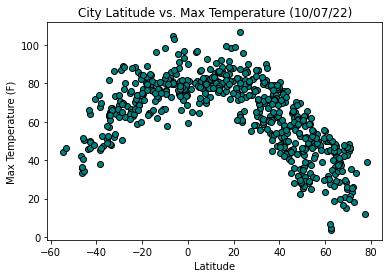

In [66]:
plt.scatter(cities_info_df["Lat"],cities_info_df["Max Temp"],marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Plots/Latitude_Temperature_Plot.png")

The code is analyzing the maximum temperature from each city and comparing it to the city's Latitude. As we can see, cities with latitude closer to de Equator (lat 0) have higher temperatures.

## Latitude vs. Humidity Plot

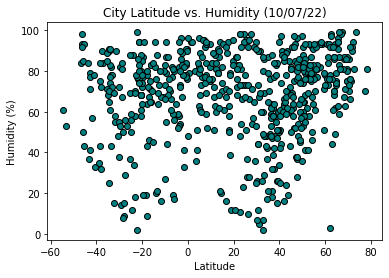

In [67]:
plt.scatter(cities_info_df["Lat"],cities_info_df["Humidity"],marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Humidity (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Plots/Latitude_Humidity_Plot.png")

The code is analyzing the humidity from each city and comparing it to the city's Latitude. As we can see, there is not much correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

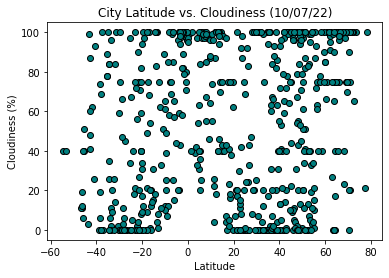

In [68]:
plt.scatter(cities_info_df["Lat"],cities_info_df["Cloudiness"],marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Plots/Latitude_Cloudiness_Plot.png")

The code is analyzing the percentage of cloudiness from each city and comparing it to the city's Latitude. As we can see, there is not much correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

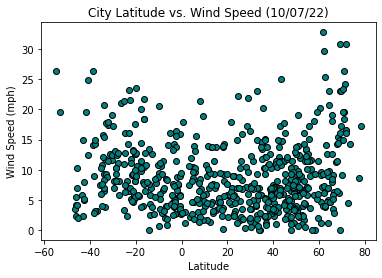

In [69]:
plt.scatter(cities_info_df["Lat"],cities_info_df["Wind Speed"],marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Plots/Latitude_WindSpeed_Plot.png")

The code is analyzing the wind speed from each city and comparing it to the city's Latitude. As we can see, there is not much correlation between wind speed and latitude, but we can notice that most cities have wind speeds lower than 15 mph.

## Linear Regression

In [38]:
north = cities_info_df[cities_info_df["Lat"]>= 0]
south = cities_info_df[cities_info_df["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

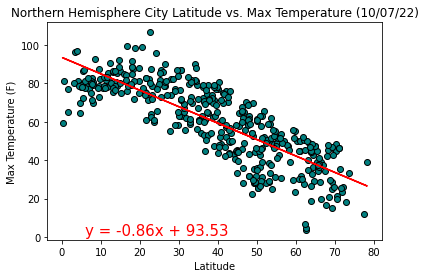

The r-value is: -0.8133568719120271


<Figure size 432x288 with 0 Axes>

In [70]:
plt.scatter(north["Lat"],north["Max Temp"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"],north["Max Temp"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.plot(north["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/north_Latitude_Temperature_Plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

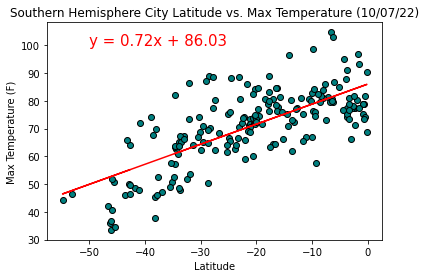

The r-value is: 0.7185524635583617


<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(south["Lat"],south["Max Temp"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"],south["Max Temp"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.plot(south["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/south_Latitude_Temperature_Plot.png")

For the Nothern Hemisphere there is a negative correlation between latitude and temperature (at higher latitudes you have lower temperatures).
For the southern Hemisphere there is a positive correlation between latitude and temperature (at higher latitudes you have higher temperatures).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

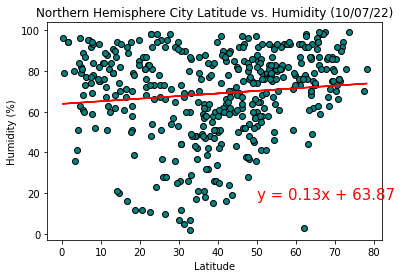

The r-value is: 0.11351381957329157


<Figure size 432x288 with 0 Axes>

In [73]:
plt.scatter(north["Lat"],north["Humidity"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Northern Hemisphere City Latitude vs. Humidity (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"],north["Humidity"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,17),fontsize=15,color="red")
plt.plot(north["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/north_Latitude_Humidity_Plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

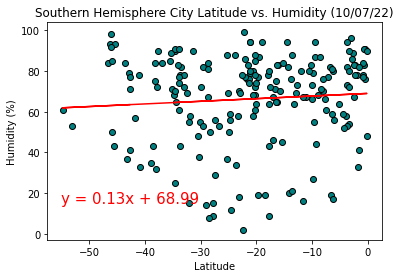

The r-value is: 0.07764303141961514


<Figure size 432x288 with 0 Axes>

In [74]:
plt.scatter(south["Lat"],south["Humidity"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Southern Hemisphere City Latitude vs. Humidity (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"],south["Humidity"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.plot(south["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/south_Latitude_Humidity_Plot.png")

There seems to be no correlation between latitude and humidity. Most of the cities in the northern and southern hemispheres have humidities of 60% or higher.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

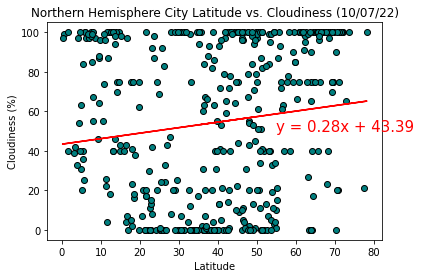

The r-value is: 0.1347111876432202


<Figure size 432x288 with 0 Axes>

In [75]:
plt.scatter(north["Lat"],north["Cloudiness"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"],north["Cloudiness"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(55,50),fontsize=15,color="red")
plt.plot(north["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/north_Latitude_Cloudiness_Plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

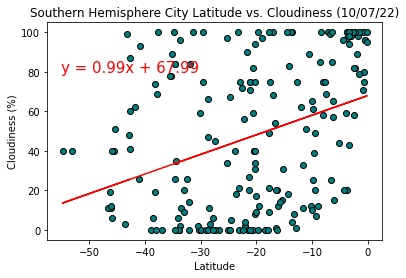

The r-value is: 0.35380849339211284


<Figure size 432x288 with 0 Axes>

In [76]:
plt.scatter(south["Lat"],south["Cloudiness"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"],south["Cloudiness"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.plot(south["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/south_Latitude_Cloudiness_Plot.png")

There seems to be no correlation between latitude and cloudiness. Most of the cities in the northern and southern hemispheres have either high percentage of cloudiness (>80%) or low percentage of cloudiness (<20%).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

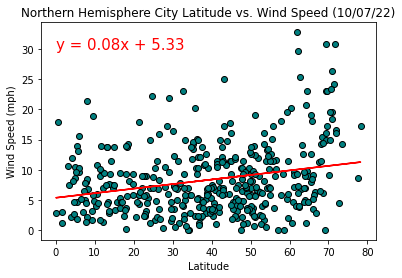

The r-value is: 0.25095103864780816


<Figure size 432x288 with 0 Axes>

In [77]:
plt.scatter(north["Lat"],north["Wind Speed"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"],north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.plot(north["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/north_Latitude_WindSpeed_Plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

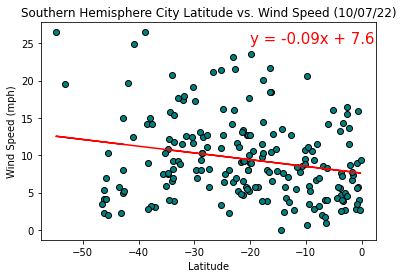

The r-value is: -0.21886614917298422


<Figure size 432x288 with 0 Axes>

In [78]:
plt.scatter(south["Lat"],south["Wind Speed"],marker="o", facecolors="teal", edgecolors="black")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (10/07/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"],south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,25),fontsize=15,color="red")
plt.plot(south["Lat"],regress_values,"r-")
plt.show()
print(f"The r-value is: {rvalue}")
plt.savefig("Plots/south_Latitude_WindSpeed_Plot.png")

There seems to be no correlation between latitude and cloudiness. Most of the cities in the northern and southern hemispheres have lower wind speeds (<15 mph).